# Optimizacion
## Programacion Lineal
Problemas de optimización con función objetivo y restricciones de igualdad y desigualdad lineales.

## Problema del combustible

El problema de optimización consiste en maximizar las ganancias en un proceso de procesamiento de combustibles. 
* Una refinería tiene dos crudo de petróleos disponibles como material.
* Produce gasolina, queroseno y combustóleo.
* Ganancias del procesamiento del crudo #1 es 1 Euro/kg y del crudo #2 es 0.7 Euro/kg.
* Cuales son sus tasas optimas de alimentación diaria? 

A continuación se describe en una tabla los valores permitidos para cada crudo por dia.

| Producto  | Crudo #1 %  | Crudo #2 % | Max Permitido (kg/dia)  |
|---|---|---|---|
| Gasolina  | 70 | 31 | 6000 |
| Queroseno | 6 | 9 | 2400 |
| Combustelo | 24 | 60 | 12000 |

El problema se puede escribir como el siguiente problema de optimización:


$\begin{array}{ll} & \max _{x_{1}, x_{2}} x_{1}+0.7 x_{2} \\ \text { s.t. } & 0.7 x_{1}+0.31 x_{2} \leq 6000 \\ & 0.06 x_{1}+0.09 x_{2} \leq 2400 \\ & 0.24 x_{1}+0.6 x_{2} \leq 12000 \\ & x_{1}, x_{2} \geq 0\end{array}$

Lo debemos llevar a la forma estandar, la cual esta dada por:
$$
\begin{array}{r}\min _{\boldsymbol{x}} \boldsymbol{d}^{\top} \boldsymbol{x} \\ \text { s.t. } \boldsymbol{A x}=\boldsymbol{b} \\ \boldsymbol{x} \geq \mathbf{0}\end{array}
$$

Comenzamos cambiando la función objetivo de maximización a minimización ($-f(\mathbf{x})$).
Para volver las condiciones de desigualdad del problema original a condiciones de igualdad en la forma estandar, debemos agregar 3 variables de olgura asi:


$\begin{array}{ll} & \min _{x_{1}, x_{2}} -x_{1}-0.7 x_{2} \\ \text { s.t. } & 0.7 x_{1}+0.31 x_{2} + v_1 = 6000 \\ & 0.06 x_{1}+0.09 x_{2} + v_2 = 2400 \\ & 0.24 x_{1}+0.6 x_{2} + v_3 = 12000 \\ & x_{1}, x_{2}, v_1,v_2,v_3 \geq 0\end{array}$

In [1]:
import numpy as np

In [2]:
b = np.array([[6000],[2400],[12000]])
A = np.array([[0.7,0.21,1,0,0],[0.06,0.09,0,1,0],[0.24,0.6,0,0,1]])
np.linalg.matrix_rank(A)

3

Observamos que el rango de la matriz es 3, la cantidad de filas/columnas linealmente independientes. Para realizar la grafica debemos saber en que rango de valores debemos movernos, para esto asumimos que pasa con la desigualdades cuando hacemos una de las variables cero.

$\begin{array}{ll}  x_{1} \leq 6000/0.7 = 26666.6 &  x_{2} \leq 6000/0.31 = 19354.84 \\  x_{1} \leq 2400/0.06 = 40000.0  &  x_{2} \leq 2400/0.09 =26666.66  \\  x_{1} \leq 12000/0.24 = 50000.0 & x_{2} \leq 12000/0.6 = 20000.0 \\ & x_{1}, x_{2} \geq 0\end{array}$

Ahora realizamos la grafica de la region donde las desigualdades estan definidas

In [3]:
import matplotlib.pyplot as plt

In [47]:
x1 = np.linspace(0,50000.0,500)
x2 = np.linspace(0,26666.66,500)
x1v, x2v = np.meshgrid(x1, x2, indexing='ij')

In [34]:
#funciones para graficar lineas
linea1 = lambda x1: (6000.0 -0.7*x1)/0.31 #x2 <= (6000-0.7*x1)/0.31
linea2 = lambda x1: (2400.0 -0.06*x1)/0.09 
linea3 = lambda x1: (12000.0 -0.24*x1)/0.6

f = lambda x1,x2: -x1 - 0.7*x2

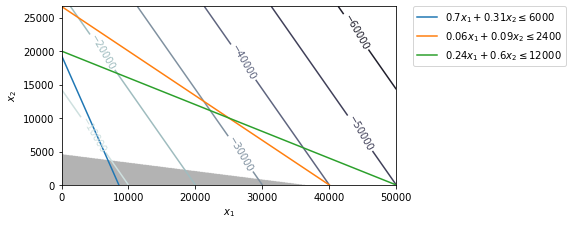

In [49]:
fig,ax=plt.subplots()
ax.cla()

ax.imshow( ( (x1v>=0.) & (x2v>=0.) & (x2v<=linea1(x1v)) & (x2v<=linea2(x1v)) & (x2v<=linea3(x1v)) ), 
                extent=(x1v.min(),x1v.max(),x2v.min(),x2v.max()),origin="lower", cmap="Greys", alpha = 0.3);

#ax.imshow( ( (x2v<=linea1(x1v))  ).astype(int), 
#                extent=(x1v.min(),x1v.max(),x2v.min(),x2v.max()),origin="lower", cmap="Reds", alpha = 0.3);

CS = ax.contour(x1v, x2v, f(x1v,x2v), cmap=plt.cm.bone)
ax.clabel(CS, inline=True, fontsize=10)
ax.plot(x1,linea1(x1),label=r'$0.7 x_{1}+0.31 x_{2} \leq 6000$')
ax.plot(x1,linea2(x1),label=r'$0.06 x_{1}+0.09 x_{2} \leq 2400$')
ax.plot(x1,linea3(x1),label=r'$0.24 x_{1}+0.6 x_{2} \leq 12000$')
ax.set_xlim([0,50000])
ax.set_ylim([0,26666.66])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$');

In [50]:
linea1(0)

19354.83870967742

## Problema 2: 
$\begin{array}{ll} & \max 4x+3y \\ \text { s.t. } & x \geq 0 \\ & y \geq 2 \\ & 2y\leq 25–x \\ & 4y\geq 2x–8 \\ & y\leq 2x−5 \end{array}$